In [61]:
import matplotlib.pyplot as plt
import torch
from PIL import Image
from data_load import ImageNet2012Dataset, RandomCrop, Rescale, ToTensor
from torchvision import transforms
import cv2

import json
with open('./dataset/labels.json') as f:
    labels = json.load(f)
    
import os
import sys
module_path = os.path.abspath(os.path.join('./models'))
if module_path not in sys.path:
    sys.path.append(module_path)

def center_crop(image, new_h, new_w):
    h, w = image.shape[:2]
    top = (h - new_h) // 2
    left = (w - new_w) // 2
    image = image[top:top + new_h, left:left + new_w]
    return image

def to_tensor(image):
    image = image.transpose((2, 0, 1))
    image = torch.from_numpy(image)
    image = image.float()
    return image

entertainment center


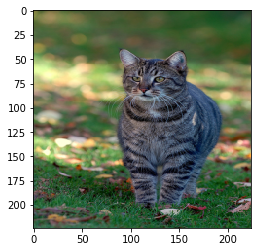

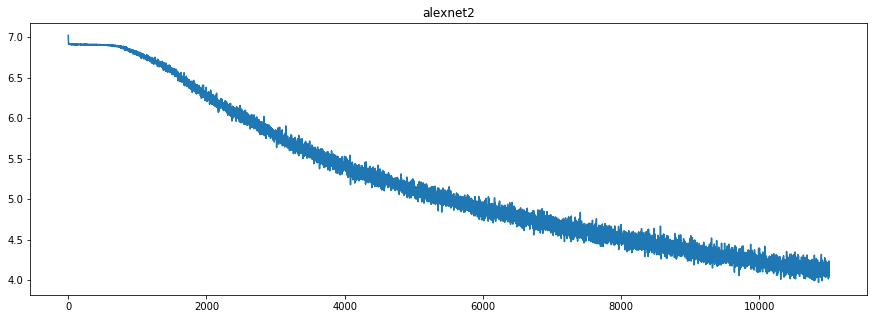

In [65]:
img = cv2.imread('./test_images/cat2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_AREA)
plt.imshow(img)
img = to_tensor(img)
img = torch.unsqueeze(img, 0)

checkpoint = torch.load(
    './saved_models/alexnet2-2018-12-11T07_58_40-epoch-11.pt', map_location='cpu')

from alexnet2 import AlexNet2
net = AlexNet2()
net.load_state_dict(checkpoint['model'])
net.eval()


with torch.no_grad():
    output = net(img)
    output = torch.squeeze(output, 0)
    output_sorted, output_indices = torch.sort(output)
    best = labels[str(output_indices[0].item())]
    print(best)

losses = [i/10 for i in checkpoint["loss_logger"]]
batches = [i for i in range(1, len(losses) + 1)]

plt.figure(figsize=(15,5))
plt.title('alexnet2')
plt.plot(batches, losses)

lifeboat


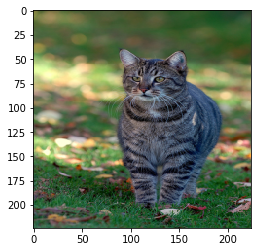

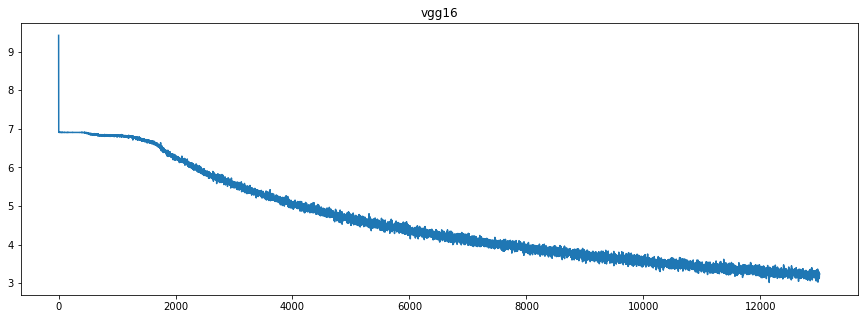

In [66]:
img = cv2.imread('./test_images/cat2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_AREA)
plt.imshow(img)
img = to_tensor(img)
img = torch.unsqueeze(img, 0)

checkpoint = torch.load(
    './saved_models/vgg16-2018-12-09T19_15_19-epoch-13.pt', map_location='cpu')

from vgg16 import VGG16
net = VGG16()
net.load_state_dict(checkpoint['model'])
net.eval()


with torch.no_grad():
    output = net(img)
    output = torch.squeeze(output, 0)
    output_sorted, output_indices = torch.sort(output)
    best = labels[str(output_indices[0].item())]
    print(best)

losses = [i/10 for i in checkpoint["loss_logger"]]
batches = [i for i in range(1, len(losses) + 1)]

plt.figure(figsize=(15,5))
plt.title('vgg16')
plt.plot(batches, losses)